## **<font color = green>Project #2: Google Play Store**

##### *S-Team: Simran Parajulee, Shuvechchha Kunwar, and Smriti Katwal*

We are using data on mobile apps of google play store for this project. Here is the link to the dataset: https://www.kaggle.com/lava18/google-play-store-apps?fbclid=IwAR3pcWyKqqpjtkj9hnk5op98J6NysyN-NDew5H9YTe1R1B4LGRd9J7Ql85w  

#### <font color = chocolate>Importing the necessary packages

In [36]:
import pandas as pd
import numpy as np 
import altair as alt
from altair import Chart, X, Y, Color, Scale
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline

#### <font color = chocolate>Reading the dataset and dropping duplicates

In [37]:
playstore_df = pd.read_csv('googleplaystore.csv').dropna(axis=1, how='all')
playstore_df.drop_duplicates(inplace=True)

#### <font color = chocolate>A look into our dataset:

In [38]:
playstore_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


#### <font color = chocolate>Description of columns in the dataset

- Acording to the data sources, here's the description of each columns in our datasets:
    - App: Name of mobile application (Identifier)
    - Category: Category of the app i.e. similar to genre (Categorical)
    - Rating: Overall user rating of the app (Numerical)
    - Reviews: Number of user reviews for the app (Numerical)
    - Size: Size of the app in MB or KB (Numerical)
    - Installs: Number of user downloads (Numerical)
    - Type: Is the app free to use to needs to be paid for i.e. Paid or Free (Binary Categorical)
    - Price: Price of the app (Numerical)
    - Content Rating: Age group targeted by the app (Categorical)
    - Genre: Genre that the app belongs to (Categorical)
    - Last Updated: Date when the app was last updated on Play Store (Categorical)
    - Current Ver: Current version of the app available on Play Store (Categorical)
    - Andriod Ver: Minimum required Android version (Categorical)

 #### <font color = chocolate> We are removing the columns that we won't be using.

In [39]:
playstore_df = playstore_df.drop(['Price', 'Genres', 'Current Ver', 'Android Ver'], axis=1)

#### <font color = chocolate>We will be looking at unique values of some columns to check if they need data cleaning.

In [40]:
playstore_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

#### <font color = chocolate>Removing '1.9' as it does not qualify as a category for mobile applications

In [41]:
playstore_df = playstore_df.loc[playstore_df.Category != '1.9'] 

In [42]:
playstore_df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

#### <font color = chocolate>Removing NaN values in the 'Rating' column

In [43]:
playstore_df = playstore_df.loc[(playstore_df.Rating.notnull())]          

#### <font color = chocolate>Removing '+' and ',' from 'Installs' column.

In [44]:
playstore_df['Installs'] = playstore_df.Installs.apply(lambda x: str(x).replace('+','')) 
playstore_df['Installs'] = playstore_df.Installs.apply(lambda x: str(x).replace(',','')).astype(int) 

In [45]:
#playstore_df.Size.unique() #checking if size column needs any data cleaning
                           #the code has been commented out because the output takes a lot of space

In [46]:
playstore_df = playstore_df.loc[playstore_df.Size != 'Varies with device'] # removing ‘Varies with Device’ value in the variable ‘Size’         

##### <font color = steelblue>*Dropping the duplicate values from the column "App", because some applications with the same name had same values for all columns except the android version column, which we won't be using in our project*

In [47]:
playstore_df = playstore_df.drop_duplicates(subset='App')

#### <font color = chocolate>Removing the letters ‘M’ and ‘k’ which stands for Megabyte and Kilobyte and converting all values to KB.

##### <font color = steelblue>*Now applying the function f_size to the 'size' column of our dataframe, so it goes through all the values in the 'size' column and checks each one of them. If the size is of type float or integer, it returns the value as it is. If the size is in string and consists of the letter "M" at the end, which stands for Megabyte, it replaces the letter "M" with an empty space, converts that value into an object of type float and then changes it from MB to KB by multiplying it by 1000. If the size is in string and consists of the letter "k" at the end, which stands for Kilobyte, it replaces the string with an empty space and converts that value into and object of type float. Then we created a new column called "Size (KB)" which contains the filtered sizes.*

In [48]:
def f_size(size):        

    if type(size) == float or type(size) == int:   
        return size  
    
    elif "M" in size:
            return float(size.replace("M"," "))*1000
    
    elif "k" in size:
            return float(size.replace("k"," "))*1
playstore_df['Size(KB)'] = playstore_df.Size.apply(f_size) 

#### <font color = chocolate>Dropping the original 'Size' column because we no longer need it.

In [49]:
playstore_df = playstore_df.drop(['Size'], axis = 1)

In [50]:
playstore_df.head() #a look into our dataset after data cleaning

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Last Updated,Size(KB)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,Everyone,"January 7, 2018",19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,"January 15, 2018",14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone,"August 1, 2018",8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,Teen,"June 8, 2018",25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,Everyone,"June 20, 2018",2800.0


##### <font color = steelblue>*In the following code box, we have created a new dataframe of rows which have rating greater than or equal to 4.1 and less than or equal to 5. The reason we have chosen these upper and lower bound for the ratings is so that we have less than 5000 rows in order to be able to visualize the data later.*

In [51]:
rating_df1 = playstore_df.loc[(playstore_df.Rating >= 4.1) &
                              (playstore_df.Rating <= 5)]
           

****
#### <font color = steelblue> We will now be exploring some questions using our dataframes created above.

#### <font color = chocolate>**Q-1. What are the top five most common categories of mobile apps?**

##### <font color = steelblue>*To answer this question, we first created a new dataframe called "category_df1" which contained the categories and the number of apps in each category from rating_df1. Then we sorted the number of apps in descending order. We changed the name of the column from "App" to "Number of Apps" because it was a more suitable name for the column.*

In [52]:
category_df1 = rating_df1.groupby('Category').count()['App'].reset_index()

category_df1 = category_df1.sort_values(by = 'App', ascending = False)

category_df1.rename(columns = {'App':'Number of Apps'}, inplace = True)

##### <font color = steelblue>*We are now creating a bar chart using category_df1, with 'Category' on the vertical axis and 'Number of Apps' on the horizontal axis. We used 'sort' to arrange the bars in descending order of their heights. Then we colored the top five categories orange and the rest blue. We used the condition 'Number of Apps' > 175 to color the bars, because when we made the graph without coloring we saw that there were more than 175 apps in the top 5 categories, and we wanted to highlight them.*

In [53]:
bars = alt.Chart(category_df1).mark_bar().encode(x='Number of Apps:Q', y=alt.Y('Category:N', sort='-x'), 
                                                 color=alt.condition(alt.datum['Number of Apps'] > 175, 
                                                                     alt.value('orange'),     
                                                                     alt.value('steelblue')   
                                                                    ))

text_of_bars = bars.mark_text(align='left', dx = 4).encode(text='Number of Apps:Q')

(bars + text_of_bars).properties(height=500)

alt.LayerChart(...)

##### <font color = forestgreen>Looking at the bar graph, we can see that the top five common categories of apps were Family, Games, Tools, Personalization, and Medical with the number of apps in each category being 1042, 635, 372, 237, and 180 respectively.

****
#### <font color = chocolate>**Q-2. Compare the free apps and apps that need to be paid for.**

##### <font color = steelblue>*In this question, we want to compare the differences across some variables for paid and free apps. We first used our original unfiltered dataframe, playstore_df, and grouped it by 'Type' column to create new dataframes, apps_df and avg_df. On apps_df, we used 'count' function to count the number of apps and calculate the percentage of total apps that are free and paid. On avg_df, we used 'mean' function to calculate the mean of 'Rating', 'Installs', and 'Size(KB)' columns for each 'Type'. We merged these two dataframes into our final dataframe, type_df.*

In [54]:
apps_df = playstore_df.groupby('Type').count()['App'].reset_index()

apps_df.rename(columns = {'App':'Number of Apps'}, inplace = True)

In [55]:
apps_df['Percentage of total apps (in %)'] = apps_df['Number of Apps'] / apps_df['Number of Apps'].sum() * 100 

In [56]:
avg_df = playstore_df.groupby('Type').mean()

avg_df.rename(columns = {   # renaming the columns, because we used mean function.
    'Rating':'Average Rating', 'Installs':'Average Installs', 'Size(KB)':'Average Size(KB)'}, inplace = True)

In [57]:
type_df = apps_df.merge(avg_df, on='Type')

type_df.round(3)

,Type,Number of Apps,Percentage of total apps (in %),Average Rating,Average Installs,Average Size(KB)
0,Free,6488,92.303,4.154,4834583.991,21860.368
1,Paid,541,7.697,4.245,78223.257,20419.396


##### <font color = forestgreen>From the above dataframe, we can see that most of the apps in Google Playstore are free. On an average, the free apps are installed more than the paid apps. The average size and for free and paid apps are very similar. Paid apps seem to have a slightly higher average rating than free apps, which makes sense because it should be providing quality service if users need to pay for it.

****
#### <font color = chocolate>**Q-3. Exhibit the distribution of ‘Content Rating’ of Apps.**

##### <font color = steelblue>*For this question, we will be using a pie-chart to see the distribution of Content Rating of Apps. We first created a new dataframe called rating_df2 by using rating_df1 and grouping by content rating to count the number of apps in each group. One of the apps was grouped under unrated, so we dropped that group.*

In [58]:
rating_df2 = rating_df1.groupby("Content Rating")["App"].count().reset_index()

rating_df2 = rating_df2.loc[rating_df2['Content Rating'] != "Unrated"]

##### <font color = steelblue>*The following cell contains the code for creating a pie-chart using matplotlib. The labels on the chart are the values from the 'Content Rating' column from the rating_df2 dataframe. We used 'autopct' to display the percentages of the pieces of the pie on the chart, and rounded them up to 2 decimal places.*

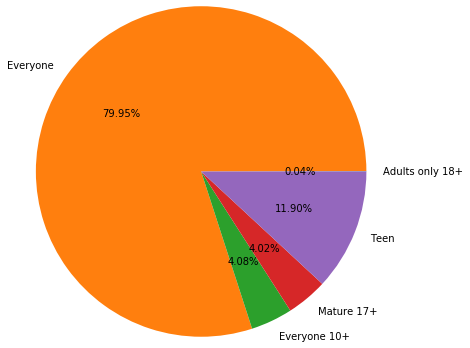

In [59]:
pie_chart = plt.pie(rating_df2["App"], radius = 1.9 ,labels = rating_df2['Content Rating'],autopct='%1.2f%%')

##### <font color = forestgreen> According to the pie-chart, the target audience for most of the Apps on google playstore is Everyone.

****
#### <font color = chocolate>**Q-4. Is there a correlation between the ratings and the number of installs for apps?**

##### <font color = steelblue>*With this question, we want to see if the apps with higher ratings have higher number of installs. We used the playstore_df to create a new dataframe called installs_df. We used the playstore_df as it wasn't filtered according to rating. We wanted to get as many values for ratings and installs as we could. However, we did filter by Installs in order to adjust the scale of our scatterplot on the vertical axis, as well as to have less than 5000 rows since we could only have a maximum of 5000 rows to be able to create the plot.*

In [60]:
installs_df = playstore_df.loc[(playstore_df.Installs > 10000) & (playstore_df.Installs <= 600000000)]

##### <font color = steelblue>*We created an interactive scatterplot using the installs_df dataframe, so that each circle showed the name of the App, its size, rating, installs and when it was last updated.*

In [61]:
alt.Chart(installs_df).mark_circle(size=40).encode(x='Rating',
                                                   y='Installs',
                                                   tooltip=['App','Size(KB)', 'Rating', 'Installs','Last Updated']).interactive()

alt.Chart(...)

##### <font color = forestgreen>From the scatterplot, we can see that there is no straightforward linear relationship between rating and installs. However, it looks like the apps with higher ratings also have higher number of installs. To check this, we calculated the correlation coefficient between these variables.

In [62]:
correlation = installs_df['Rating'].corr(installs_df['Installs'])
correlation.round(4)

0.0852

##### <font color = forestgreen>There is a positive correlation between rating of an app and its installs. However, this relationship is not very strong.

****
#### <font color = chocolate>**Q-5. What is the size of the app with the highest number of installations?**

##### <font color = steelblue>*We first used max() to find the maximum value of Installs in the playstore_df dataframe. We used this dataframe because it is unfiltered, for most parts. Then we used 'loc' to get the name and size of the app with the maximum number of installs.*

In [63]:
max_installs = playstore_df['Installs'].max()
playstore_df.loc[playstore_df.Installs == max_installs][["App","Size(KB)"]]

,App,Size(KB)
1654,Subway Surfers,76000.0
3736,Google News,13000.0


##### <font color = forestgreen>Subway Surfers and Google News were the most installed apps and their sizes were 76000 KB and 13000 KB respectively. We could note that even though there is a huge difference between the size of these apps (63000 KB), the number of installs for both apps are same. 